<a href="https://colab.research.google.com/github/nayoung718/essa_python_1/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%94%A5%EB%9F%AC%EB%8B%9D_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C_87p_~_95p%2C_105p_~_115p_%ED%95%84%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

파이썬 딥러닝 텐서플로 ch3.4, 6 ~ 7 87p ~ 95p, 105p ~ 115p 필사

87 ~ 95 pg

04. 모델 세부 설정

In [2]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist

# load_data()로 데이터셋 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 로드된 데이터셋 확인
print('train set: ', x_train.shape, y_train.shape)
print('test set: ', x_test.shape, y_test.shape)

# 데이터 정규화
x_train = x_train / x_train.max() # max : 255.0
x_test = x_test / x_test.max() # max: 255.0

11490434/11490434 [==============================] - 0s 0us/step
train set:  (60000, 28, 28) (60000,)
test set:  (10000, 28, 28) (10000,)


4-1. 초기값 설정


In [3]:
dense = tf.keras.layers.Dense(256, activation='relu')
dense.get_config()['kernel_initializer']

{'module': 'keras.initializers',
 'class_name': 'GlorotUniform',
 'config': {'seed': None},
 'registered_name': None}

In [4]:
#기본값 glorotuniform 초기화 방법 henormal로 변경 -> kernel_initializer 매개변수에 설정
# 문자열 초기화
dense = tf.keras.layers.Dense(256, activation='relu', kernel_initializer='he_normal')
dense.get_config()['kernel_initializer']

# 클래스 인스턴스 초기화
he_normal = tf.keras.initializers.HeNormal()
dense = tf.keras.layers.Dense(256, activation='relu', kernel_initializer=he_normal)
dense.get_config()['kernel_initializer']

{'module': 'keras.initializers',
 'class_name': 'HeNormal',
 'config': {'seed': None},
 'registered_name': None}

4-2. 규제

In [5]:
# 기본값
dense = tf.keras.layers.Dense(256, activation='relu')
dense.get_config()

{'name': 'dense_3',
 'trainable': True,
 'dtype': 'float32',
 'units': 256,
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'module': 'keras.initializers',
  'class_name': 'GlorotUniform',
  'config': {'seed': None},
  'registered_name': None},
 'bias_initializer': {'module': 'keras.initializers',
  'class_name': 'Zeros',
  'config': {},
  'registered_name': None},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

In [7]:
#l1 규제 적용
dense = tf.keras.layers.Dense(256, activation='relu', kernel_regularizer='l1')
print(dense.get_config()['kernel_regularizer'])

# 클래스 인스턴스 적용, alpha = 0.1 변경
regularizer = tf.keras.regularizers.l1(0.1)
dense = tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizer)
print(dense.get_config()['kernel_regularizer'])


{'module': 'keras.regularizers', 'class_name': 'L1', 'config': {'l1': 0.009999999776482582}, 'registered_name': None}
{'module': 'keras.regularizers', 'class_name': 'L1', 'config': {'l1': 0.10000000149011612}, 'registered_name': None}


4-3. 드롭아웃

딥러닝 -> 과대적합 문제 : 드롭아웃

In [8]:
# dropout 25% 비율 적용(25%의 노드가 삭제)
tf.keras.layers.Dropout(0.25)

4-4. 배치 정규화

In [9]:
# model a : dense + reLu
model_a = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),])
model_a.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 52650 (205.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# model b : dense + batchnorm + relu
model_b = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치 정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(32),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치 정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(10, activation='softmax'),])
model_b.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                50240     
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                     

배치 정규화만 추가해도 손실 이전에 비해 더 안정적이고 빠르게 수렴

4-5. 활성화 함수


In [11]:
# leakyReLU 기본 설정
tf.keras.layers.LeakyReLU()

# LeakyReLU, alpha = 0.2 로 변경
tf.keras.layers.LeakyReLU(alpha=0.2)

In [12]:
# model c : dense + batchnorm + leakyReLU(0.2)
model_c = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # leakyReLU, alpha = 0.2 적용
    tf.keras.layers.LeakyReLU(alpha=0.2),

    tf.keras.layers.Dense(32),
    #배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # leakyReLU, alpha = 0.2 적용
    tf.keras.layers.LeakyReLU(alpha=0.2),

    tf.keras.layers.Dense(10, activation='softmax'),])

# 모델 요약
model_c.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_2 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_3 (Bat  (None, 32)                128       
 chNormalization)                                     

In [13]:
# model a, b, c 수렴속도 확인
model_a.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_b.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_c.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# model a : dense + relu
history_a = model_a.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

# model b : dense + batchnorm + relu
history_b = model_b.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

# model c : dense + batchnorm + leakyReLU(0.2)
history_c = model_c.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2886 - accuracy: 0.9162 - val_loss: 0.1539 - val_accuracy: 0.9538
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1312 - accuracy: 0.9605 - val_loss: 0.1094 - val_accuracy: 0.9673
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0957 - accuracy: 0.9709 - val_loss: 0.1000 - val_accuracy: 0.9727
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0760 - accuracy: 0.9767 - val_loss: 0.0930 - val_accuracy: 0.9744
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0643 - accuracy: 0.9796 - val_loss: 0.0949 - val_accuracy: 0.9720
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0536 - accuracy: 0.9827 - val_loss: 0.1017 - val_accuracy: 0.9732
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0457 - accuracy: 0.9857 - val_loss: 0.0984 - val_ac

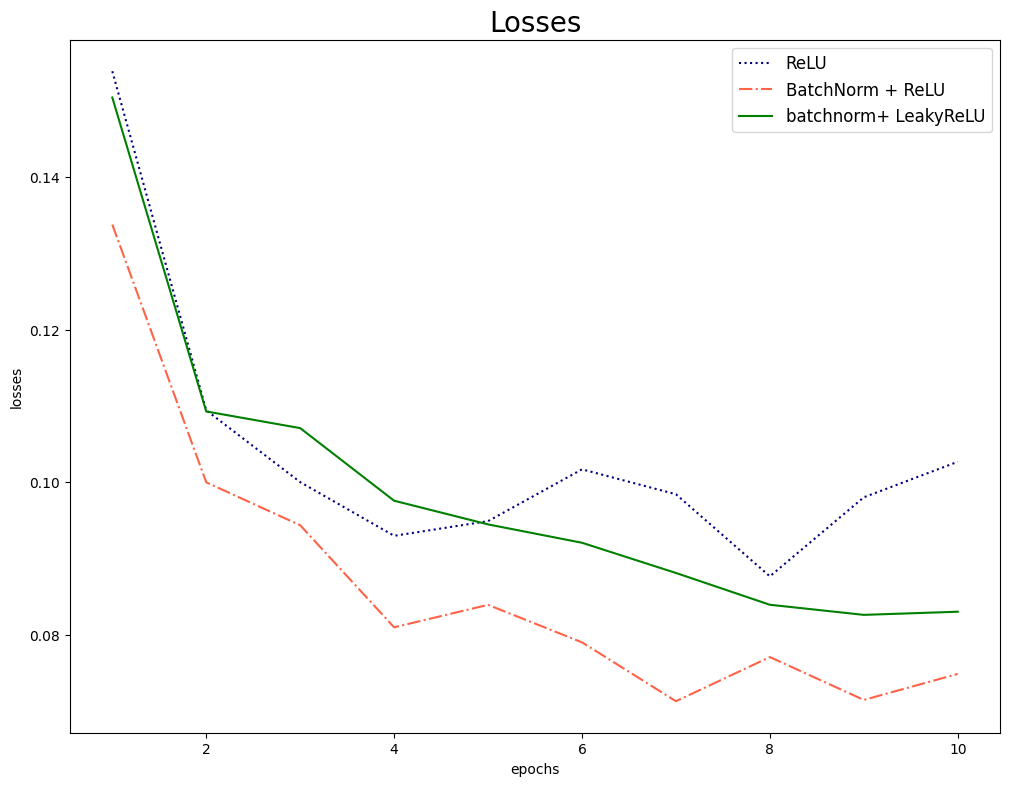

In [15]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 9))
plt.plot(np.arange(1,11), history_a.history['val_loss'], color='navy', linestyle=':')
plt.plot(np.arange(1,11), history_b.history['val_loss'], color='tomato', linestyle='-.')
plt.plot(np.arange(1,11), history_c.history['val_loss'], color='green', linestyle='-')

plt.title('Losses', fontsize=20)
plt.xlabel('epochs')
plt.ylabel('losses')
plt.legend(['ReLU','BatchNorm + ReLU','batchnorm+ LeakyReLU'], fontsize=12)
plt.show()

105p ~ 115p

06. 모델 저장 및 불러오기


In [16]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist

# load_data()로 데이터셋 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 로드된 데이터셋 확인
print('train set: ', x_train.shape, y_train.shape)
print('test set: ', x_test.shape, y_test.shape)

# 데이터 정규화
x_train = x_train / x_train.max() # max : 255.0
x_test = x_test / x_test.max() # max: 255.0

train set:  (60000, 28, 28) (60000,)
test set:  (10000, 28, 28) (10000,)


6-1. 모델을 파일로 저장

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),])

In [20]:
# 모델을 h5 포맷으로 저장
model.save('h5_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6-2. 저장된 모델 복원

In [21]:
# 모델 복원
h5_model = tf.keras.models.load_model('h5_model.h5')
h5_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 256)               200960    
                                                                 
 dense_16 (Dense)            (None, 64)                16448     
                                                                 
 dense_17 (Dense)            (None, 32)                2080      
                                                                 
 dense_18 (Dense)            (None, 10)                330       
                                                                 
Total params: 219818 (858.66 KB)
Trainable params: 219818 (858.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
h5_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [26]:
# 모델 검증
loss, acc = h5_model.evaluate(x_test, y_test, verbose = 0)
print(f'h5 model] loss: {loss}, acc: {acc}')

h5 model] loss: 2.3163297176361084, acc: 0.08569999784231186


In [28]:
# 모델을 savedmodel 포맷으로 저장
model.save('saved-model')

In [29]:
# 모델 복원
saved_model = tf.keras.models.load_model('saved-model')
saved_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 256)               200960    
                                                                 
 dense_16 (Dense)            (None, 64)                16448     
                                                                 
 dense_17 (Dense)            (None, 32)                2080      
                                                                 
 dense_18 (Dense)            (None, 10)                330       
                                                                 
Total params: 219818 (858.66 KB)
Trainable params: 219818 (858.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
# 모델 검증(HDF5 포맷)
loss, acc = saved_model.evaluate(x_test, y_test, verbose = 0)
print(f'H5 model] loss: {loss:.5f}, acc: {acc:.5f}')

# 모델 검증(savedmodel 포맷)
loss, acc = saved_model.evaluate(x_test, y_test, verbose = 0)
print(f'saved model] loss: {loss:.5f}, acc: {acc:.5f}')

H5 model] loss: 2.31633, acc: 0.00450
saved model] loss: 2.31633, acc: 0.00450


07. 복잡한 모델 생성

7-1. 함수형 API
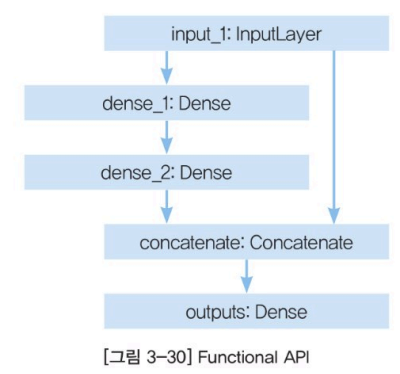

Sequential API : 단방향 모델만 구현 가능 : 제약 -> 특정 레이어 건너뛰거나 병합/분리 구조 모델 구현 불가능

In [31]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist

# load_data()로 데이터셋 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 로드된 데이터셋 확인
print('train set: ', x_train.shape, y_train.shape)
print('test set: ', x_test.shape, y_test.shape)

# 데이터 정규화
x_train = x_train / x_train.max() # max : 255.0
x_test = x_test / x_test.max() # max: 255.0

train set:  (60000, 28, 28) (60000,)
test set:  (10000, 28, 28) (10000,)


In [33]:
# 모델의 레이어를 체인 구조로 연결 INPUT 레이어 정의
input_layer = tf.keras.Input(shape=(28, 28), name = 'InputLayer')

# 모델의 레이어를 체인구조로 연결
x1 = tf.keras.layers.Flatten(name = 'Flatten')(input_layer)
x2 = tf.keras.layers.Dense(256, activation='relu', name = 'Dense1')(x1)
x3 = tf.keras.layers.Dense(64, activation='relu', name = 'Dense2')(x2)
x4 = tf.keras.layers.Dense(10, activation='softmax', name = 'OutputLayer')(x3)

# 모델  생성
func_model = tf.keras.Model(inputs = input_layer, outputs = x4, name = 'FunctionalModel')
# 모델 요약
func_model.summary()

Model: "FunctionalModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 28, 28)]          0         
                                                                 
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 Dense1 (Dense)              (None, 256)               200960    
                                                                 
 Dense2 (Dense)              (None, 64)                16448     
                                                                 
 OutputLayer (Dense)         (None, 10)                650       
                                                                 
Total params: 218058 (851.79 KB)
Trainable params: 218058 (851.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


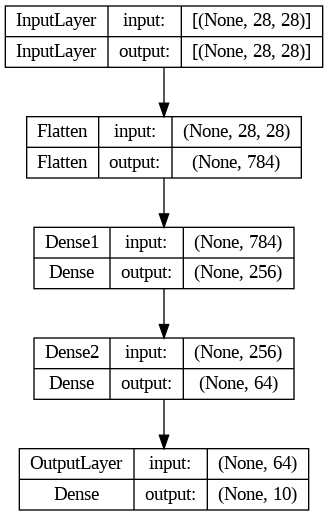

In [34]:
# 모델 구조도 시각화
from tensorflow.keras.utils import plot_model
# 구조도 시각화
plot_model(func_model, show_shapes=True, show_layer_names=True, to_file='model.png')

show_shapes = true : 데이터 입출력 shape

show_layer_names = true : 레이어 이름 출력

to_file : 이미지 파일로 저장

In [35]:
# 컴파일
func_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#훈련
func_model.fit(x_train, y_train, epochs=3)

# 검증
loss, acc = func_model.evaluate(x_test, y_test, verbose=0)
print(f'Functional Model] loss: {loss: .5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2145 - accuracy: 0.9358
Epoch 2/3
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0874 - accuracy: 0.9731
Epoch 3/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0611 - accuracy: 0.9805
Functional Model] loss:  0.09098, acc: 0.97160


7-2. 모델 서브클래싱

클래스 상속받아 사용자가 직접 서브클래스로 딥러닝 모델 만들어

In [37]:
class MyModel(tf.keras.Model):
  def __init__(self):
    super(MyModel, self).__init__()
    #초기값 설정
    self.flatten = tf.keras.layers.Flatten()
    self.dense1 = tf.keras.layers.Dense(256, activation='relu')
    self.dense2 = tf.keras.layers.Dense(64, activation='relu')
    self.dense3 = tf.keras.layers.Dense(10, activation='softmax')

  # method overiding
  # 훈련용 함수 정의
  # x 는 input
  def call(self, x):
    x = self.flatten(x)
    x = self.dense1(x)
    x = self.dense2(x)
    x = self.dense3(x)
    return x

In [38]:
# 모델 생성
mymodel = MyModel()

# 모델의 이름 설정
mymodel._name = 'subclass_model'

# 모델 input 정의
mymodel(tf.keras.layers.Input(shape=(28,28)))

# 모델 요약
mymodel.summary()

Model: "subclass_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         multiple                  0         
                                                                 
 dense_19 (Dense)            multiple                  200960    
                                                                 
 dense_20 (Dense)            multiple                  16448     
                                                                 
 dense_21 (Dense)            multiple                  650       
                                                                 
Total params: 218058 (851.79 KB)
Trainable params: 218058 (851.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
# 컴파일
mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 훈련
mymodel.fit(x_train, y_train, epochs=3)

# 검증
loss, acc = mymodel.evaluate(x_test, y_test, verbose=0)
print(f'Subclass Model] loss: {loss: .5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2120 - accuracy: 0.9372
Epoch 2/3
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0858 - accuracy: 0.9741
Epoch 3/3
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0588 - accuracy: 0.9811
Subclass Model] loss:  0.08667, acc: 0.97220


7-3. 서브클래싱 모델 파라미터를 활용한 생성


In [40]:
class MyModel(tf.keras.Model):
  def __init__(self, units, num_classes):
    super(MyModel, self).__init__()
    #초기값 설정
    self.flatten = tf.keras.layers.Flatten()
    self.dense1 = tf.keras.layers.Dense(units, activation='relu')
    self.dense2 = tf.keras.layers.Dense(units/4, activation='relu')
    self.dense3 = tf.keras.layers.Dense(num_classes, activation='softmax')

  # class overiding
  # 훈련용 함수 정의
  # x 는 input
  def call(self, x):
    x = self.flatten(x)
    x = self.dense1(x)
    x = self.dense2(x)
    x = self.dense3(x)
    return x

In [41]:
# 모델 생성
mymodel = MyModel(256,10)

# 모델 input 정의
mymodel(tf.keras.layers.Input(shape=(28,28)))

# 모델 요약
mymodel.summary()

Model: "my_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         multiple                  0         
                                                                 
 dense_22 (Dense)            multiple                  200960    
                                                                 
 dense_23 (Dense)            multiple                  16448     
                                                                 
 dense_24 (Dense)            multiple                  650       
                                                                 
Total params: 218058 (851.79 KB)
Trainable params: 218058 (851.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
# 컴파일
mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 훈련
mymodel.fit(x_train, y_train, epochs=3)

# 검증
loss, acc = mymodel.evaluate(x_test, y_test, verbose=0)
print(f'Subclass Model w.parameters] loss: {loss: .5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2128 - accuracy: 0.9357
Epoch 2/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0870 - accuracy: 0.9736
Epoch 3/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0615 - accuracy: 0.9801
Subclass Model] loss:  0.07436, acc: 0.97720
